In [13]:
import h5py

# Correcting the approach to correctly handle groups and datasets in the HDF5 file
def explore_hdf5_group(group, path=""):
    """
    Recursively explores the contents of an HDF5 group, collecting information about
    its datasets and subgroups.
    """
    items = {}
    for key in group.keys():
        if isinstance(group[key], h5py.Dataset):
            # For datasets, store their shape and data type
            items[path + key] = {"type": "Dataset", "shape": group[key].shape, "dtype": str(group[key].dtype)}
        elif isinstance(group[key], h5py.Group):
            # For groups, recursively explore their contents
            items.update(explore_hdf5_group(group[key], path + key + "/"))
    return items

file_path = 'output_digi_HDF_2Body.h5'
# Open the HDF5 file again and explore its contents properly
with h5py.File(file_path, 'r') as file:
    # Use the new function to explore the file from the root group
    file_structure = explore_hdf5_group(file)

# Showing a preview of the file structure (first few items for brevity)
list(file_structure.items())[:5]


# Open the new HDF5 file to examine its structure
new_file_path = 'output_digi_HDF_2Body.h5'

with h5py.File(new_file_path, 'r') as file:
    # Use the function to explore the file from the root group
    new_file_structure = explore_hdf5_group(file)

# Showing a preview of the new file structure (first few items for brevity)
len(list(new_file_structure.items()))


10000

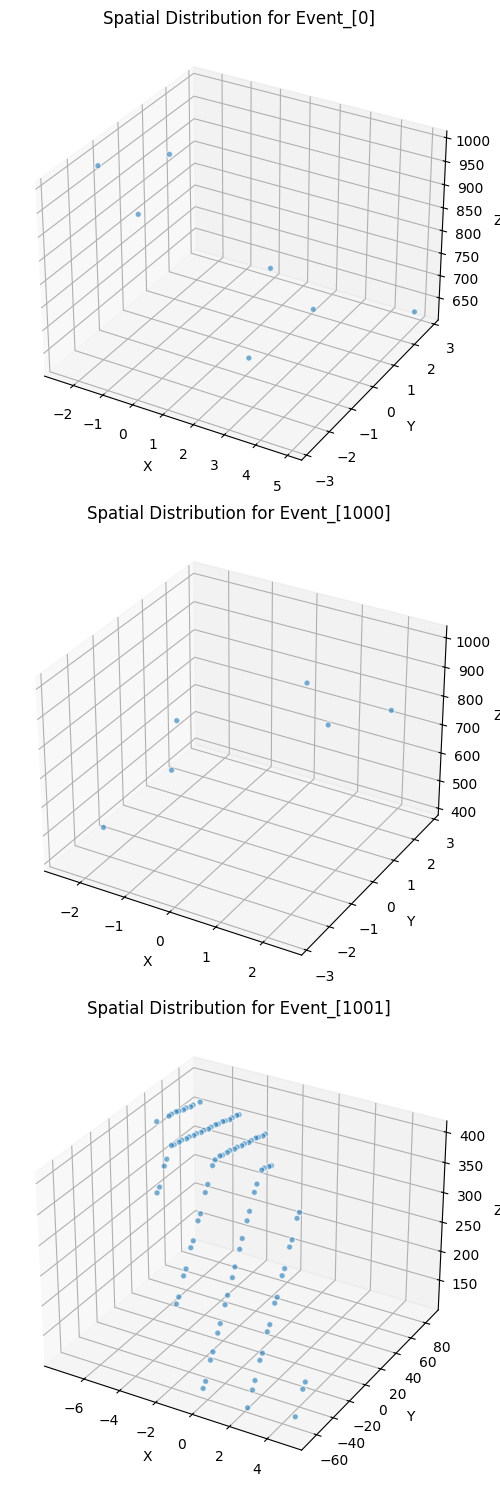

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Function to plot the spatial distribution for a selection of events
def plot_spatial_distribution(file, event_names, num_events=3):
    fig = plt.figure(figsize=(15, 5 * num_events))
    
    for i, event_name in enumerate(event_names[:num_events]):
        dataset = file[event_name]
        data = np.array(dataset)
        
        ax = fig.add_subplot(num_events, 1, i + 1, projection='3d')
        ax.scatter(data['x'], data['y'], data['z'], alpha=0.6, edgecolors='w', s=20)
        ax.set_title(f"Spatial Distribution for {event_name}")
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
    
    plt.tight_layout()
    plt.show()

# Open the HDF5 file and plot the spatial distribution for the first few events
with h5py.File(new_file_path, 'r') as file:
    event_names = list(file.keys())
    plot_spatial_distribution(file, event_names)


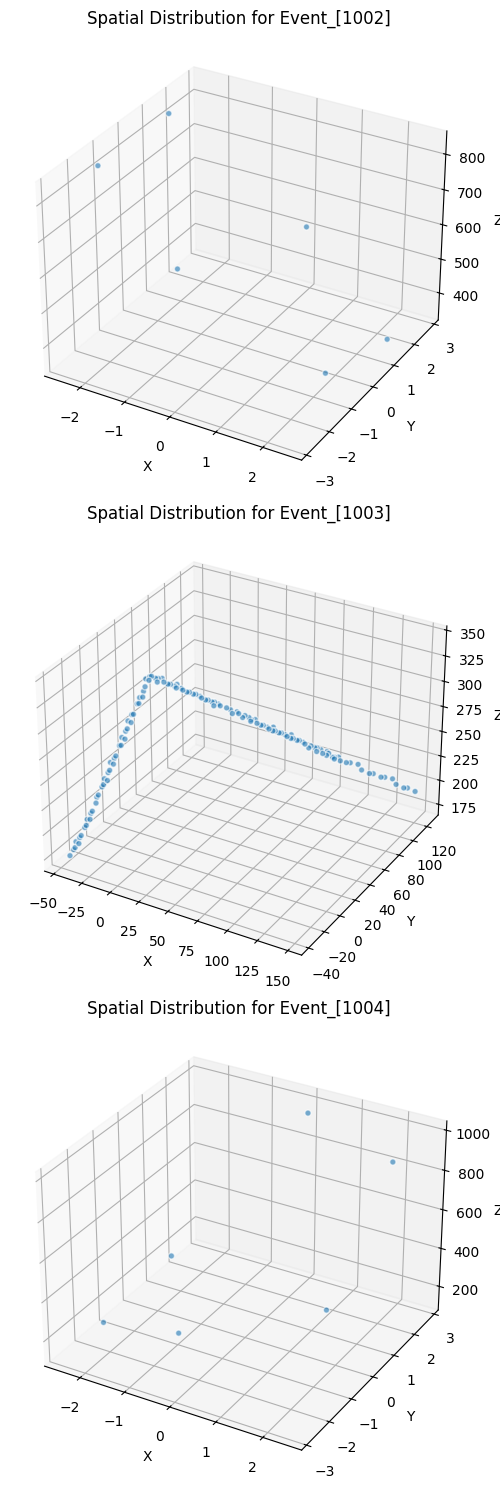

In [7]:
# Plot the spatial distribution for additional events beyond the initial few
# Adjusting the function call to plot more events
with h5py.File(new_file_path, 'r') as file:
    # Let's select a different range of events to plot
    additional_event_names = list(file.keys())[3:6]  # Selecting a new set of events to plot
    plot_spatial_distribution(file, additional_event_names)


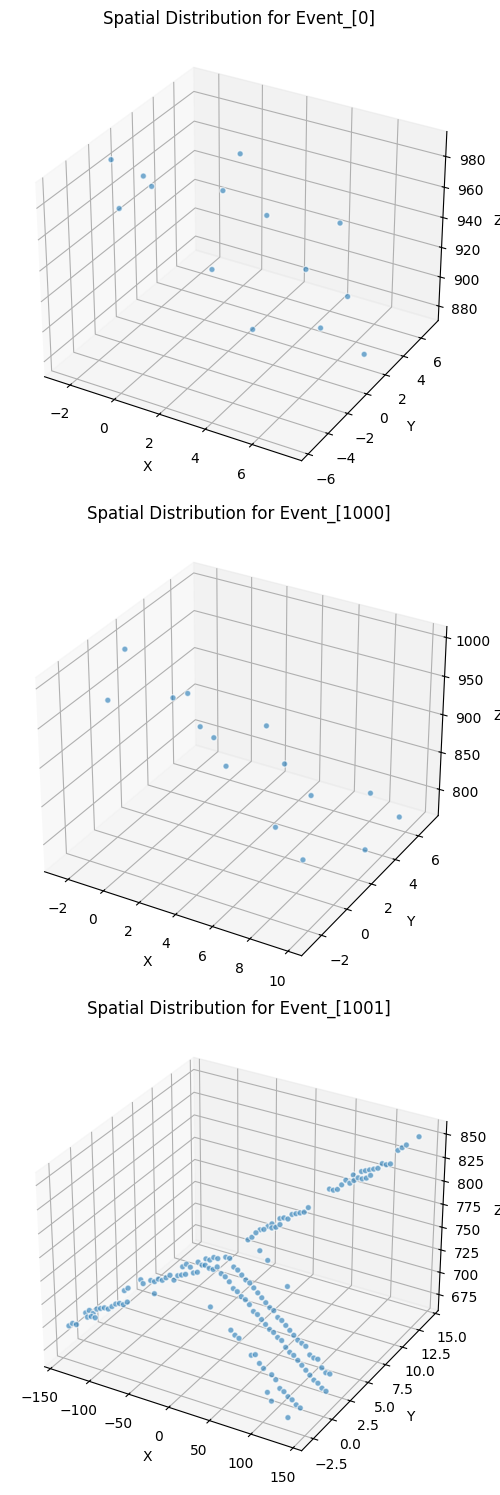

In [8]:

new_file_path_3body = "output_digi_HDF_3Body.h5"
# Plot the spatial distribution for the first few events of the new 3-body file
with h5py.File(new_file_path_3body, 'r') as file:
    event_names_3body = list(file.keys())
    plot_spatial_distribution(file, event_names_3body)


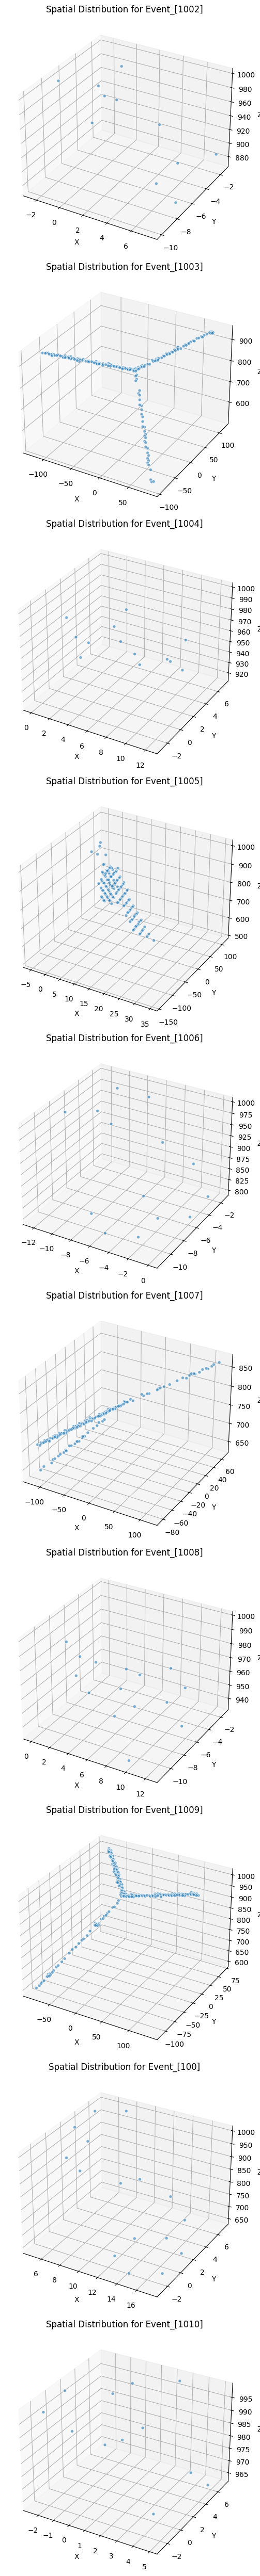

In [9]:
# Plot the spatial distribution for 10 more events from the 3-body file
# Adjusting the function call to plot a larger set of events beyond the initial few
with h5py.File(new_file_path_3body, 'r') as file:
    # Selecting 10 more events to plot, starting from the 4th to the 13th
    more_event_names_3body = list(file.keys())[3:13]
    plot_spatial_distribution(file, more_event_names_3body, num_events=10)


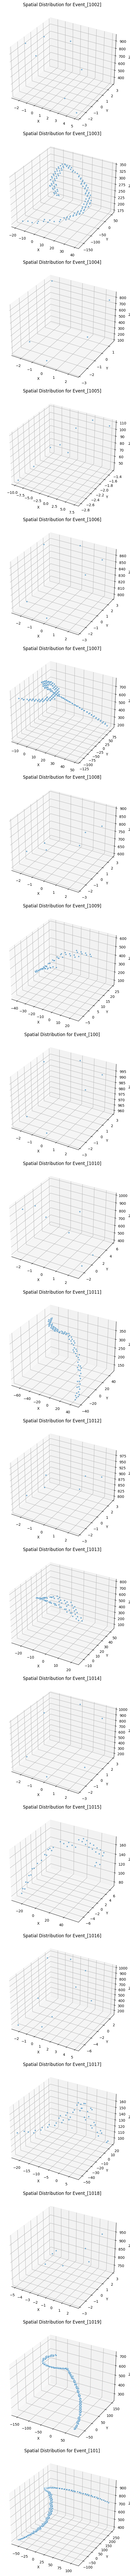

In [11]:

new_file_path_3body = "output_digi_HDF_2Body_2T.h5"
# Plot the spatial distribution for 10 more events from the 3-body file
# Adjusting the function call to plot a larger set of events beyond the initial few
with h5py.File(new_file_path_3body, 'r') as file:
    # Selecting 10 more events to plot, starting from the 4th to the 13th
    more_event_names_3body = list(file.keys())[3:23]
    plot_spatial_distribution(file, more_event_names_3body, num_events=20)


In [12]:
# It seems the previous attempt to explore the file structure resulted in a timeout, likely due to its size or complexity.
# Let's try a more efficient method to quickly get an overview of its structure without printing every detail.

# Open the file again with a more concise approach
with h5py.File(file_path, 'r') as file_2:
    # Collect the top-level structure of the file for a quick overview
    structure_overview = {name: "Group" if isinstance(obj, h5py.Group) else f"Dataset shape: {obj.shape}, dtype: {obj.dtype}" for name, obj in file_2.items()}

structure_overview


{'Event_[0]': "Dataset shape: (7,), dtype: {'names': ['x', 'y', 'z', 't', 'A', 'trackID'], 'formats': ['<f8', '<f8', '<f8', '<i4', '<f8', '<i4'], 'offsets': [0, 8, 16, 24, 32, 40], 'itemsize': 48}",
 'Event_[1000]': "Dataset shape: (6,), dtype: {'names': ['x', 'y', 'z', 't', 'A', 'trackID'], 'formats': ['<f8', '<f8', '<f8', '<i4', '<f8', '<i4'], 'offsets': [0, 8, 16, 24, 32, 40], 'itemsize': 48}",
 'Event_[1001]': "Dataset shape: (98,), dtype: {'names': ['x', 'y', 'z', 't', 'A', 'trackID'], 'formats': ['<f8', '<f8', '<f8', '<i4', '<f8', '<i4'], 'offsets': [0, 8, 16, 24, 32, 40], 'itemsize': 48}",
 'Event_[1002]': "Dataset shape: (6,), dtype: {'names': ['x', 'y', 'z', 't', 'A', 'trackID'], 'formats': ['<f8', '<f8', '<f8', '<i4', '<f8', '<i4'], 'offsets': [0, 8, 16, 24, 32, 40], 'itemsize': 48}",
 'Event_[1003]': "Dataset shape: (129,), dtype: {'names': ['x', 'y', 'z', 't', 'A', 'trackID'], 'formats': ['<f8', '<f8', '<f8', '<i4', '<f8', '<i4'], 'offsets': [0, 8, 16, 24, 32, 40], 'itemsiz